<a href="https://colab.research.google.com/github/Jiya003/User-behaviour-and-Recommendation-analysis/blob/main/User_Behaviour_and_Recommendation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Uploading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the dataset

In [ ]:
# Loading files from the Google Drive
events_df = pd.read_csv('/content/drive/My Drive/archive/events.csv')



In [ ]:
item_properties1_df = pd.read_csv('/content/drive/My Drive/archive/item_properties_part1.csv')
item_properties2_df=pd.read_csv('/content/drive/My Drive/archive/item_properties_part2.csv')

In [ ]:
category_tree_df = pd.read_csv('/content/drive/My Drive/archive/category_tree.csv')

## Exploring the Dataset

In [ ]:
print("Events dataframe")
print(events_df.head())
print("*"*50)
print()
print("Item properties dataframe")
print(item_properties1_df.head())
print(item_properties2_df.head())
print("*"*50)
print()
print("Category tree dataframe")
print(category_tree_df.head())


Events dataframe
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
**************************************************

Item properties dataframe
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513
       timestamp  itemid property            value
0  1433041200000  183478      561           769062
1  1439694000000  132256      976  n26.40

In [ ]:
print("Events dataframe")
print(events_df.tail())
print("*"*50)
print()
print("Item properties dataframe")
print(item_properties1_df.tail())
print(item_properties2_df.tail())
print("*"*50)
print()
print("Category tree dataframe")
print(category_tree_df.tail())


Events dataframe
             timestamp  visitorid event  itemid  transactionid
1048570  1440539444831     962125  view  447661            NaN
1048571  1440536779000    1324403  view   40140            NaN
1048572  1440536767349     962489  view  272976            NaN
1048573  1440539483251     201845  view  204260            NaN
1048574  1440536759916     515314  view  201386            NaN
**************************************************

Item properties dataframe
              timestamp  itemid    property                            value
10999994  1439694000000   86599  categoryid                              618
10999995  1435460400000  153032        1066                 n1020.000 424566
10999996  1440298800000  421788         888               35975 856003 37346
10999997  1437879600000  159792         400  n552.000 639502 n720.000 424566
10999998  1436065200000  464846         790                      n410640.000
             timestamp  itemid property                          

## Handling the missing values

### Checking for missing values

In [ ]:
print("Events dataframe null value:")
print(events_df.isnull().sum())
print("*"*150)
print()
print("Item properties dataframe null value:")
print(item_properties1_df.isnull().sum())
print(item_properties2_df.isnull().sum())
print("*"*150)
print()
print("Category tree dataframe null value:")
print(category_tree_df.isnull().sum())


Events dataframe null value:
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    1039921
dtype: int64
******************************************************************************************************************************************************

Item properties dataframe null value:
timestamp    0
itemid       0
property     0
value        0
dtype: int64
timestamp    0
itemid       0
property     0
value        0
dtype: int64
******************************************************************************************************************************************************

Category tree dataframe null value:
categoryid     0
parentid      25
dtype: int64


### Null value percentage

In [ ]:
def null_percentage(df):
    return df.isnull().sum() / len(df) * 100

# Calculating the null percentage for each DataFrame
events_null_percentage = null_percentage(events_df)
item_properties1_null_percentage = null_percentage(item_properties1_df)
item_properties2_null_percentage = null_percentage(item_properties2_df)
category_tree_null_percentage = null_percentage(category_tree_df)

# Printing the results
print("Null Value Percentage in events_df:\n", events_null_percentage)
print("\nNull Value Percentage in item_properties1:\n", item_properties1_null_percentage)
print("\nNull Value Percentage in item_properties2:\n", item_properties2_null_percentage)
print("\nNull Value Percentage in category_tree_df:\n", category_tree_null_percentage)




Null Value Percentage in events_df:
 timestamp         0.000000
visitorid         0.000000
event             0.000000
itemid            0.000000
transactionid    99.174689
dtype: float64

Null Value Percentage in item_properties1:
 timestamp    0.0
itemid       0.0
property     0.0
value        0.0
dtype: float64

Null Value Percentage in item_properties2:
 timestamp    0.0
itemid       0.0
property     0.0
value        0.0
dtype: float64

Null Value Percentage in category_tree_df:
 categoryid    0.000000
parentid      1.497903
dtype: float64


As we see in the events.csv, the transaction_id column is mostly missing. So, we are droping the column

In [ ]:
events_df = events_df.drop(columns=['transactionid'])


Missing values in category_tree_df

parentid likely represents hierarchical relationships in the category tree, where categoryid is a sub-category, and parentid is the parent category.

In [ ]:
category_tree_df.dropna(subset=['parentid'], inplace=True)


## Outlier analysis

### Visualization of Data Distribution

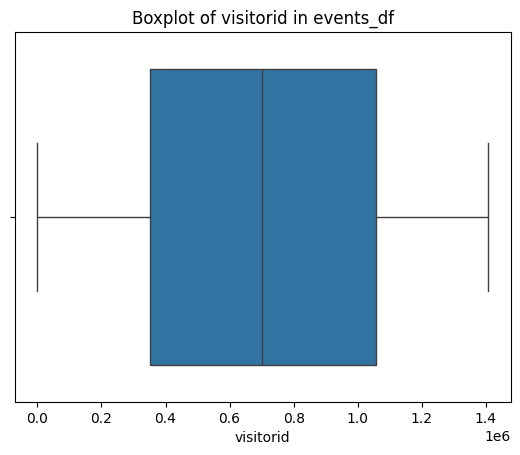

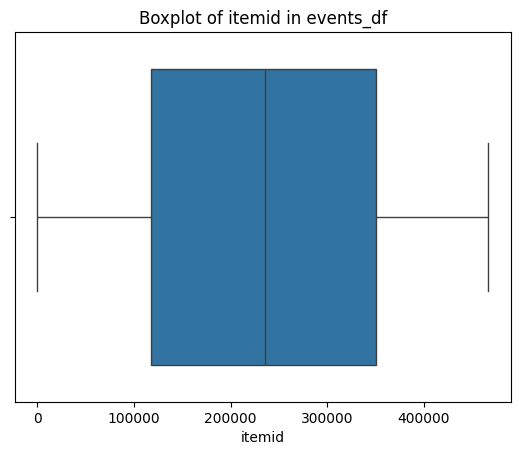

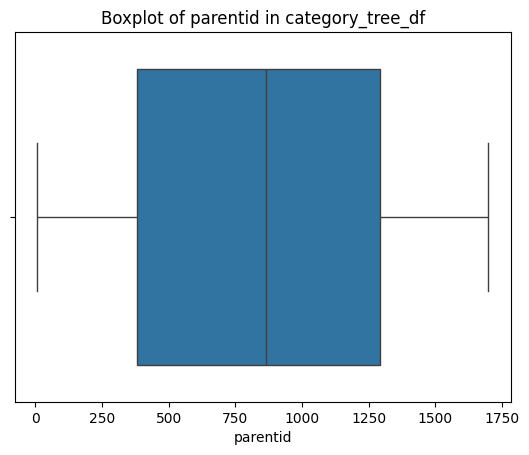

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For events_df
sns.boxplot(x=events_df['visitorid'])
plt.title('Boxplot of visitorid in events_df')
plt.show()

sns.boxplot(x=events_df['itemid'])
plt.title('Boxplot of itemid in events_df')
plt.show()


sns.boxplot(x=category_tree_df['parentid'])
plt.title('Boxplot of parentid in category_tree_df')
plt.show()


### Z-score Method

#### Events_df

In [ ]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   timestamp          1048575 non-null  int64  
 1   visitorid          1048575 non-null  int64  
 2   event              1048575 non-null  object 
 3   itemid             1048575 non-null  int64  
 4   z_score_visitorid  1048575 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 40.0+ MB


In [ ]:
from scipy import stats

# for events_df
events_df['z_score_visitorid'] = stats.zscore(events_df['visitorid'])

# Identify outliers
outliers = events_df[(events_df['z_score_visitorid'] > 3) | (events_df['z_score_visitorid'] < -3)]
print("Outliers based on visitorid Z-score:\n", outliers)


Outliers based on visitorid Z-score:
 Empty DataFrame
Columns: [timestamp, visitorid, event, itemid, z_score_visitorid]
Index: []


In [ ]:
events_df['z_score_itemid'] = stats.zscore(events_df['itemid'])

# Identify outliers
outliers = events_df[(events_df['z_score_itemid'] > 3) | (events_df['z_score_itemid'] < -3)]
print("Outliers based on itemid Z-score:\n", outliers)


Outliers based on itemid Z-score:
 Empty DataFrame
Columns: [timestamp, visitorid, event, itemid, z_score_visitorid, z_score_itemid]
Index: []


So no outliers

#### items_properties_part1

In [ ]:
item_properties1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


In [ ]:
item_properties1_df['z_score_itemid'] = stats.zscore(item_properties1_df['itemid'])

# Identify outliers
outliers = item_properties1_df[(item_properties1_df['z_score_itemid'] > 3) | (item_properties1_df['z_score_itemid'] < -3)]
print("Outliers based on itemid Z-score:\n", outliers)

Outliers based on itemid Z-score:
 Empty DataFrame
Columns: [timestamp, itemid, property, value, z_score_itemid]
Index: []


So no outliers


#### items_properties_part2


In [ ]:
item_properties2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


In [ ]:
item_properties2_df['z_score_itemid'] = stats.zscore(item_properties2_df['itemid'])

# Identify outliers
outliers = item_properties2_df[(item_properties2_df['z_score_itemid'] > 3) | (item_properties2_df['z_score_itemid'] < -3)]
print("Outliers based on itemid Z-score:\n", outliers)

Outliers based on itemid Z-score:
 Empty DataFrame
Columns: [timestamp, itemid, property, value, z_score_itemid]
Index: []


So no outliers

#### category tree_df

In [ ]:
category_tree_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1644 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 38.5 KB


In [ ]:
category_tree_df['z_score_categoryid'] = stats.zscore(category_tree_df['categoryid'])

# Identify outliers
outliers = category_tree_df[(category_tree_df['z_score_categoryid'] > 3) | (category_tree_df['z_score_categoryid'] < -3)]
print("Outliers based on categoryid Z-score:\n", outliers)

Outliers based on categoryid Z-score:
 Empty DataFrame
Columns: [categoryid, parentid, z_score_categoryid]
Index: []


In [ ]:
category_tree_df['z_score_parentid'] = stats.zscore(category_tree_df['parentid'])

# Identify outliers
outliers = category_tree_df[(category_tree_df['z_score_parentid'] > 3) | (category_tree_df['z_score_parentid'] < -3)]
print("Outliers based on parentid Z-score:\n", outliers)

Outliers based on parentid Z-score:
 Empty DataFrame
Columns: [categoryid, parentid, z_score_categoryid, z_score_parentid]
Index: []


## Visualization of dataset

### Scatter plot

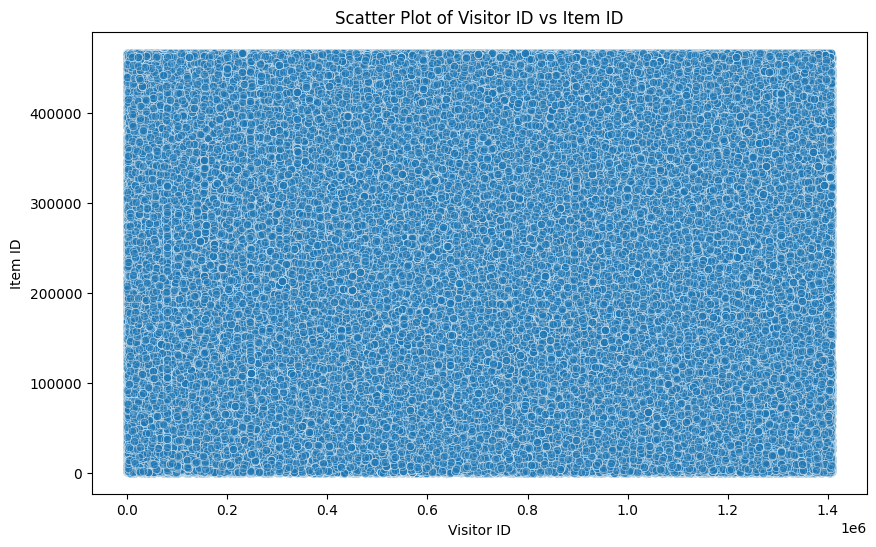

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visitorid', y='itemid', data=events_df, alpha=0.5)
plt.title('Scatter Plot of Visitor ID vs Item ID')
plt.xlabel('Visitor ID')
plt.ylabel('Item ID')
plt.show()


### Pair plot

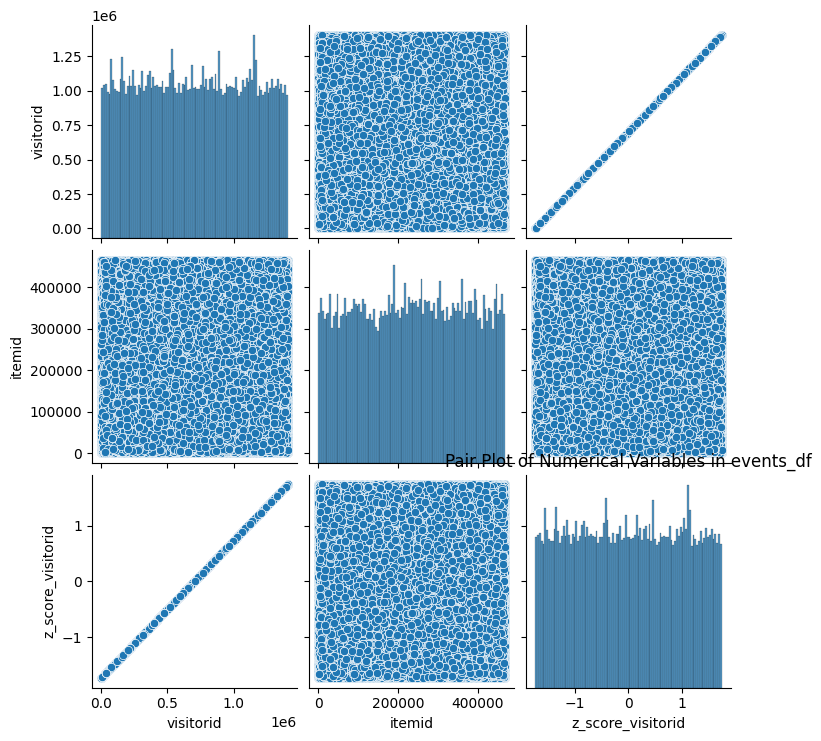

In [ ]:
# Create a pair plot for numerical columns in events_df
sns.pairplot(events_df[['visitorid', 'itemid', 'z_score_visitorid']])
plt.title('Pair Plot of Numerical Variables in events_df')
plt.show()


### Line Chart

In [ ]:
#For trends over time

# Converting timestamp to datetime if necessary
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], unit='s')

# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(events_df['timestamp'], events_df['visitorid'], alpha=0.5)
plt.title('Line Chart of Visitor ID Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Visitor ID')
plt.xticks(rotation=45)
plt.show()


### Histograms

In [ ]:
# For understanding the distribution of the numerical variables

# Histograms for numerical columns
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(events_df['visitorid'], bins=50, kde=True)
plt.title('Histogram of Visitor ID')

plt.subplot(1, 3, 2)
sns.histplot(events_df['itemid'], bins=50, kde=True)
plt.title('Histogram of Item ID')

plt.subplot(1, 3, 3)
sns.histplot(events_df['z_score_visitorid'], bins=50, kde=True)
plt.title('Histogram of Z-Score Visitor ID')

plt.tight_layout()
plt.show()


### Correlation Matrix


In [ ]:
#relationship betweem numerical variables

# Compute the correlation matrix
corr_matrix = events_df[['visitorid', 'itemid', 'z_score_visitorid']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for events_df')
plt.show()


### Count Plot

In [ ]:
# Count Plot for properties
plt.figure(figsize=(12, 6))
sns.countplot(data=item_properties1_df, x='property', order=item_properties1_df['property'].value_counts().index)
plt.title('Count Plot of Properties in item_properties1_df')
plt.xticks(rotation=45)
plt.show()

# Repeat for item_properties2_df
plt.figure(figsize=(12, 6))
sns.countplot(data=item_properties2_df, x='property', order=item_properties2_df['property'].value_counts().index)
plt.title('Count Plot of Properties in item_properties2_df')
plt.xticks(rotation=45)
plt.show()


### Histogram

In [ ]:
# Histogram for categoryid
plt.figure(figsize=(12, 6))
sns.histplot(category_tree_df['categoryid'], bins=30, kde=True)
plt.title('Histogram of Category ID')
plt.show()

# Histogram for parentid
plt.figure(figsize=(12, 6))
sns.histplot(category_tree_df['parentid'], bins=30, kde=True)
plt.title('Histogram of Parent ID')
plt.show()


# Question : Data-driven insights

What are the general statistics of each dataset (mean, median, standard deviation, etc.)?

How many unique values are there in each categorical column?

What is the total number of records in each dataset?

How is the data distributed across different time periods in the events_df?



### events_df Specific Questions

What is the distribution of event types in events_df?


How many unique visitorid values are there?


What is the range of timestamp values?


What are the top 10 most frequent itemid values in events_df?


How does the visitorid distribution vary across different event types?


Are there any noticeable trends in visitorid over time?


What percentage of records have a non-null transactionid?

### item_properties1_df and item_properties2_df Specific Questions


What are the most common property values in item_properties1_df?


How do the value distributions compare across different property values in item_properties1_df?


What is the total number of unique itemid values in item_properties1_df?


Are there any differences in property distributions between item_properties1_df and item_properties2_df?


What are the most common value types in item_properties2_df?


How many unique itemid values are there in item_properties2_df?


### category_tree_df Specific Questions

What is the distribution of categoryid values?

How many unique parentid values are there?

What percentage of parentid values are null?

How are categoryid values distributed across different parentid values?

Are there any parentid values that appear frequently?

### Correlation and Relationships


What is the correlation between visitorid and itemid in events_df?

How do different event types correlate with itemid?

What is the correlation between itemid and other properties in item_properties1_df and item_properties2_df?

How does the distribution of categoryid relate to parentid?



### Temporal and Trend Analysis


What are the trends in the number of events over time?


How does the number of unique visitors change over different time periods?


Are there any seasonal patterns in events_df?

### Data Quality and Cleaning

 What are the patterns of missing values in each dataset?

 How does the presence of null values in parentid impact the analysis of category_tree_df?


 Are there any inconsistencies or duplicates in itemid values across item_properties1_df and item_properties2_df?